# **Exploratory Data Analysis for World Bank API data**
This notebook outlines the steps taken to perform an EDA on the World Bank API data. The World Bank Indicators API provides access to nearly 16,000 time series indicators. Most of these indicators are available online through tools such as Databank and the Open Data website. The API provides programmatic access to this same data.

Of this large number of indicators, 10 were chosen thinking that they could be useful for a future analysis of the data we have on leukemia.

To begin, the necessary libraries are imported to ensure the correct functioning of the code.

In [1]:
import pandas as pd
import os
import json
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt


### ***Extracting needed countries***

Taking into account that in the dataset related to leukemia we have data distributed around only 22 countries the first thing that will be done to work with the API data will be to filter the countries it contains so that it has exactly the same 22 countries of the Dataset of leukemia

The working directory is changed so that the system can locate the credentials json and api dataset.

In [2]:
os.chdir("..")
print(os.getcwd())

c:\Users\valen\Desktop\Leukemia-Cancer-Risk-ETL


The credentials are read and extracted to establish a connection to PostgreSQL. Then, the connection to the leukemia database stored in PostgreSQL is established.

In [3]:
with open("credentials.json") as f:
    credentials = json.load(f)

db_host = credentials["db_host"]
db_name = credentials["db_name"]
db_user = credentials["db_user"]
db_password = credentials["db_password"]
db_port = credentials["db_port"]  

conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port  )

🗺️ Now, we run a query to extract the countries stored in the leukemia data given that those are the ones that we are gonna need from the api dataset

In [4]:
cursor = conn.cursor()
query = 'SELECT DISTINCT(country) FROM leukemia_clean_data_positive;'
cursor.execute(query)

needed_countries = [row[0] for row in cursor.fetchall()]

print(needed_countries)


['Saudi Arabia', 'Turkey', 'Spain', 'Argentina', 'Italy', 'Russia', 'China', 'India', 'Sweden', 'Norway', 'USA', 'France', 'Netherlands', 'Mexico', 'South Africa', 'Brazil', 'UK', 'Australia', 'Germany', 'Japan', 'Canada', 'South Korea']


They get standarized into lowercase to avoid problems filtering the api dataset

In [5]:
needed_countries = [x.lower() for x in needed_countries]
print(needed_countries)

['saudi arabia', 'turkey', 'spain', 'argentina', 'italy', 'russia', 'china', 'india', 'sweden', 'norway', 'usa', 'france', 'netherlands', 'mexico', 'south africa', 'brazil', 'uk', 'australia', 'germany', 'japan', 'canada', 'south korea']


Now, we read the csv extracted from the API

In [6]:
df = pd.read_csv("data/world_bank_data.csv")
df

,Country,Year,Carbon dioxide (CO2) emissions per capita,Electricity production from nuclear sources,Employment in agriculture,Fertilizer consumption,GDP per capita,PM2.5 air pollution (mean annual exposure),Population living in slums,Poverty headcount ratio at national poverty lines,Prevalence of moderate or severe food insecurity,Prevalence of undernourishment,Total alcohol consumption per capita (liters of pure alcohol)
0,Afghanistan,2000,0.050476,NaN,65.651597,100.000000,174.930991,64.767280,NaN,NaN,NaN,NaN,0.003
1,Afghanistan,2001,0.046573,NaN,65.025449,100.000000,138.706822,64.597573,NaN,NaN,NaN,46.0,0.003
2,Afghanistan,2002,0.044078,NaN,64.186689,104.751559,178.954088,64.416888,NaN,NaN,NaN,43.7,0.007
3,Afghanistan,2003,0.044341,NaN,63.481557,166.822535,198.871116,64.176231,NaN,NaN,NaN,38.6,0.016
4,Afghanistan,2004,0.037898,NaN,62.469948,170.466492,221.763654,63.826609,NaN,NaN,NaN,35.9,0.021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5170,Zimbabwe,2019,0.731382,NaN,62.397972,623.474178,1684.027904,18.528607,NaN,38.3,69.8,39.4,3.630
5171,Zimbabwe,2020,0.584283,NaN,58.741384,212.474438,1730.413489,19.494180,21.56821,NaN,73.0,39.5,2.670
5172,Zimbabwe,2021,0.672480,NaN,53.622533,212.474438,1724.387731,NaN,NaN,NaN,73.6,38.9,NaN
5173,Zimbabwe,2022,0.682243,NaN,53.323843,212.474438,2040.552459,NaN,NaN,NaN,70.7,38.1,NaN


#### Filtering countries

After reading the API data and loading it into a DataFrame we realized that the values in the country column were not in lowercase, so we standarized it.

In [7]:
df["Country"] = df["Country"].str.lower()
df

,Country,Year,Carbon dioxide (CO2) emissions per capita,Electricity production from nuclear sources,Employment in agriculture,Fertilizer consumption,GDP per capita,PM2.5 air pollution (mean annual exposure),Population living in slums,Poverty headcount ratio at national poverty lines,Prevalence of moderate or severe food insecurity,Prevalence of undernourishment,Total alcohol consumption per capita (liters of pure alcohol)
0,afghanistan,2000,0.050476,NaN,65.651597,100.000000,174.930991,64.767280,NaN,NaN,NaN,NaN,0.003
1,afghanistan,2001,0.046573,NaN,65.025449,100.000000,138.706822,64.597573,NaN,NaN,NaN,46.0,0.003
2,afghanistan,2002,0.044078,NaN,64.186689,104.751559,178.954088,64.416888,NaN,NaN,NaN,43.7,0.007
3,afghanistan,2003,0.044341,NaN,63.481557,166.822535,198.871116,64.176231,NaN,NaN,NaN,38.6,0.016
4,afghanistan,2004,0.037898,NaN,62.469948,170.466492,221.763654,63.826609,NaN,NaN,NaN,35.9,0.021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5170,zimbabwe,2019,0.731382,NaN,62.397972,623.474178,1684.027904,18.528607,NaN,38.3,69.8,39.4,3.630
5171,zimbabwe,2020,0.584283,NaN,58.741384,212.474438,1730.413489,19.494180,21.56821,NaN,73.0,39.5,2.670
5172,zimbabwe,2021,0.672480,NaN,53.622533,212.474438,1724.387731,NaN,NaN,NaN,73.6,38.9,NaN
5173,zimbabwe,2022,0.682243,NaN,53.323843,212.474438,2040.552459,NaN,NaN,NaN,70.7,38.1,NaN


Now, verify the values contained in the country column to catch possible errors when filtering the data by countries

In [8]:
print("Countries found in the world bank api data (raw):")
print(df["Country"].unique())

Countries found in the world bank api data (raw):
['afghanistan' 'albania' 'algeria' 'american samoa' 'andorra' 'angola'
 'antigua and barbuda' 'argentina' 'armenia' 'aruba' 'australia' 'austria'
 'azerbaijan' 'bahamas, the' 'bahrain' 'bangladesh' 'barbados' 'belarus'
 'belgium' 'belize' 'benin' 'bermuda' 'bhutan' 'bolivia'
 'bosnia and herzegovina' 'botswana' 'brazil' 'british virgin islands'
 'brunei darussalam' 'bulgaria' 'burkina faso' 'burundi' 'cabo verde'
 'cambodia' 'cameroon' 'canada' 'cayman islands'
 'central african republic' 'chad' 'channel islands' 'chile' 'china'
 'colombia' 'comoros' 'congo, dem. rep.' 'congo, rep.' 'costa rica'
 "cote d'ivoire" 'croatia' 'cuba' 'curacao' 'cyprus' 'czechia' 'denmark'
 'djibouti' 'dominica' 'dominican republic' 'ecuador' 'egypt, arab rep.'
 'el salvador' 'equatorial guinea' 'eritrea' 'estonia' 'eswatini'
 'ethiopia' 'faroe islands' 'fiji' 'finland' 'france' 'french polynesia'
 'gabon' 'gambia, the' 'georgia' 'germany' 'ghana' 'gibraltar'

Using this information, verify what values in the needed_countries list weren´t found in the country column from the api DataFrame

In [9]:
found_countries = df["Country"].unique()
missing = set(needed_countries) - set(found_countries)

print("Countries that do not yet appear after mapping:")
print(missing)

Countries that do not yet appear after mapping:
{'uk', 'russia', 'south korea', 'usa', 'turkey'}


As you can see, 5 out 22 countries weren´t found in the api DataFrame Country column

#### Cleaning of country names
Some country names on the dataset do not exactly match our list of interest "needed_countries".
For example:
- `"usa"` → `"United States"`
- `"south korea"` → `"Korea, Rep."`

To avoid errors when filtering, a manual mapping of names is applied using the world bank country and lending group list of country names.

We establish a dictionary where we replace the values in the needed_countries list with the values that is possible to find in the api DataFrame country column

In [10]:
corrections = {
    "usa": "united states",
    "uk": "united kingdom",
    "turkey": "turkiye",
    "russia": "russian federation",
    "south korea": "korea, rep." 
}

Now, we assing this corrections to the values in "needed_countries" list and filter the DataFrame using it

In [11]:
needed_countries = [corrections.get(p, p) for p in needed_countries]

df = df[df["Country"].isin(needed_countries)]
df


,Country,Year,Carbon dioxide (CO2) emissions per capita,Electricity production from nuclear sources,Employment in agriculture,Fertilizer consumption,GDP per capita,PM2.5 air pollution (mean annual exposure),Population living in slums,Poverty headcount ratio at national poverty lines,Prevalence of moderate or severe food insecurity,Prevalence of undernourishment,Total alcohol consumption per capita (liters of pure alcohol)
168,argentina,2000,3.675006,6.947475,1.082816,587.063265,7637.014892,17.426036,20.29188,NaN,NaN,NaN,6.73
169,argentina,2001,3.490969,7.833324,1.065900,198.936303,7141.475077,17.183874,NaN,NaN,NaN,2.9,6.73
170,argentina,2002,3.262086,6.892591,1.061939,160.851251,2569.699635,16.923514,19.56624,NaN,NaN,3.7,6.17
171,argentina,2003,3.519761,8.221232,1.021523,197.584495,3320.477751,16.643572,NaN,NaN,NaN,4.3,5.84
172,argentina,2004,3.857510,7.856038,0.969933,222.144902,4242.020991,16.342663,18.84059,NaN,NaN,3.9,5.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4930,united states,2019,15.127925,NaN,1.679713,104.671624,65604.681520,7.176021,NaN,NaN,8.2,2.5,9.57
4931,united states,2020,13.471131,NaN,1.746393,106.612569,64411.373178,7.814858,NaN,NaN,8.0,2.5,9.90
4932,united states,2021,14.320730,NaN,1.662403,110.002617,71318.307359,NaN,NaN,NaN,8.6,2.5,NaN
4933,united states,2022,14.362560,NaN,1.620544,100.791158,78035.175360,NaN,NaN,NaN,9.1,2.5,NaN


Finally, we establish if there are any countries tha weren´t mapped when filtering the API DataFrame

In [12]:
found_countries = df["Country"].unique()
missing_countries = set(needed_countries) - set(found_countries)

if not missing_countries:
    print("All countries were found in the DataFrame!:)")
else:
    print("Countries that are missing:", missing_countries)


All countries were found in the DataFrame!:)


### ***Validations: finding and handling outliers, duplicates and null values***

#### ***General overview of the Dataframe***

After loading the data into the Dataframe and filtering it, the following general validations are performed:

- The size of the dataframe.
- Information about each column in the dataframe (data type, entries and non-null values).
- Statistical description of both numerical and categorical columns.
- Presence of duplicate records in the dataframe. 

Also, a rename of the columns is performed to improve the consistency, readability and efficiency of the data.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 168 to 4934
Data columns (total 13 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Country                                                        528 non-null    object 
 1   Year                                                           528 non-null    int64  
 2   Carbon dioxide (CO2) emissions per capita                      528 non-null    float64
 3   Electricity production from nuclear sources                    345 non-null    float64
 4   Employment in agriculture                                      528 non-null    float64
 5   Fertilizer consumption                                         490 non-null    float64
 6   GDP per capita                                                 528 non-null    float64
 7   PM2.5 air pollution (mean annual exposure)                     4

🧪 ***Dataframe information overview***

After reviewing the structure and content of the DataFrame trough `df.info()`, a key observation emerged:

- Presence of Missing Values

    - While most indicators contain some missing values, three variables in particular exhibit a significantly high proportion of nulls.

    - To ensure data quality, these missing values will be further explored and handled later in the workflow of this notebook. The treatment strategy will be based on the distribution pattern and contextual relevance of each variable.

📄 ***Dataset Column Descriptions***

| *Column Name* | *Description* |
|-------------|-------------|
| **Country** | Name of the country associated with the observation. |
| **Year** | Calendar year when the indicator was measured. |
| **Carbon dioxide (CO₂) emissions per capita** | Annual CO₂ emissions (excluding land-use change and forestry), expressed per person. Measured in metric tons per capita. |
| **Electricity production from nuclear sources (% of total)** | Percentage of total electricity generation produced by nuclear power plants. Includes electricity and combined heat and power (CHP) plants. |
| **Employment in agriculture (% of total employment)** | Share of the total employed labor force working in agriculture-related activities. |
| **Fertilizer consumption (kg per hectare of arable land)** | Average quantity of fertilizer (in kilograms of plant nutrients) used per hectare of arable land. |
| **GDP per capita (current US$)** | Gross domestic product divided by midyear population, expressed in current U.S. dollars. |
| **PM2.5 air pollution (mean annual exposure, µg/m³)** | Population-weighted average exposure to particulate matter less than 2.5 microns in diameter, measured in micrograms per cubic meter. |
| **Population living in slums (% of urban population)** | Percentage of urban population residing in slum-like conditions based on housing and service deprivation. |
| **Poverty headcount ratio at national poverty lines (% of population)** | Proportion of the population living below the nationally defined poverty threshold(s). |
| **Prevalence of moderate or severe food insecurity (% of population)** | Percentage of individuals living in households experiencing moderate or severe levels of food insecurity. |
| **Prevalence of undernourishment (% of population)** | Share of the population whose dietary energy intake is insufficient to meet minimum energy requirements. |
| **Total alcohol consumption per capita (liters)** | Total alcohol intake per person (aged 15+) over a calendar year, measured in liters of pure alcohol. Includes recorded and estimated unrecorded consumption, adjusted for tourism. |


📝 ***Renaming columns***:

To make the Dataframe easier to work with, we will rename the columns this way we'll avoid any problems with the conventions and improve the efficiency to access the data

In [14]:
rename_dict = {
    'Country': 'country',
    'Year': 'year',
    'Carbon dioxide (CO2) emissions per capita': 'co2_emissions_per_capita',
    'Electricity production from nuclear sources': 'nuclear_energy_pct',
    'Employment in agriculture': 'agri_employment_pct',
    'Fertilizer consumption': 'fertilizer_consumption',
    'GDP per capita': 'gdp_per_capita',
    'PM2.5 air pollution (mean annual exposure)': 'pm25_pollution',
    'Population living in slums': 'slum_population_pct',
    'Poverty headcount ratio at national poverty lines': 'poverty_rate',
    'Prevalence of moderate or severe food insecurity': 'food_insecurity_rate',
    'Prevalence of undernourishment': 'undernourishment_rate',
    'Total alcohol consumption per capita (liters of pure alcohol)': 'alcohol_consumption_liters'
}

df = df.rename(columns=rename_dict)
print("Updated Column Names:")
print(df.columns.tolist())

Updated Column Names:
['country', 'year', 'co2_emissions_per_capita', 'nuclear_energy_pct', 'agri_employment_pct', 'fertilizer_consumption', 'gdp_per_capita', 'pm25_pollution', 'slum_population_pct', 'poverty_rate', 'food_insecurity_rate', 'undernourishment_rate', 'alcohol_consumption_liters']


📏 ***Validation of the Dataframe dimensions***

In [15]:
df.shape

(528, 13)

📊 ***Basic statistical descriptions of the Dataframe***

*df.describe()* provides summary statistics (e.g., mean, std, min, max) for numerical columns. <br>
*df.describe(include='object')* provides summary statistics (e.g., count, unique, top, frequency) for categorical columns. <br>

In [16]:
print("\nSummary Statistics for Numerical Columns:")
df.describe()



Summary Statistics for Numerical Columns:


,year,co2_emissions_per_capita,nuclear_energy_pct,agri_employment_pct,fertilizer_consumption,gdp_per_capita,pm25_pollution,slum_population_pct,poverty_rate,food_insecurity_rate,undernourishment_rate,alcohol_consumption_liters
count,528.000000,528.000000,345.000000,528.000000,490.000000,528.000000,462.000000,59.000000,123.000000,133.000000,484.000000,462.000000
mean,2011.500000,8.833673,14.428838,9.355474,177.691582,29381.458461,20.504546,27.674939,20.053659,9.921805,3.613843,8.271472
std,6.928751,5.042435,18.523435,12.432614,352.339982,21518.184779,15.858440,12.645427,11.251049,8.154673,2.920194,3.367407
min,2000.000000,0.938683,0.000000,0.570907,5.049011,442.750219,5.636708,14.126110,0.000000,2.000000,2.500000,0.000000
25%,2005.750000,4.614677,1.732825,2.114357,51.163924,10004.922656,10.646638,18.323420,13.400000,5.000000,2.500000,6.760000
50%,2011.500000,8.158096,5.201559,3.897851,127.504206,28978.174844,14.931312,24.562980,18.600000,6.300000,2.500000,8.890000
75%,2017.250000,11.469179,20.445566,11.590108,226.803497,43551.928000,23.319082,29.590410,20.700000,11.900000,3.400000,10.517500
max,2023.000000,21.012618,79.511660,59.644730,7180.738745,108798.451166,79.037396,55.294770,66.600000,37.000000,22.000000,14.650000


In [17]:
print("\nSummary Statistics for Categorical Columns:")
df.describe(include='object')


Summary Statistics for Categorical Columns:


,country
count,528
unique,22
top,argentina
freq,24


📍***Check for duplicates***

In [18]:
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of duplicates: 0


#### ***Validating null values***

🔎 ***Verifying the amount of years and its distribution by country***

In [19]:
print("Unique years:", df['year'].nunique())
print(df.groupby('country')['year'].count().sort_values(ascending=False))

Unique years: 24
country
argentina             24
australia             24
brazil                24
canada                24
china                 24
france                24
germany               24
india                 24
italy                 24
japan                 24
korea, rep.           24
mexico                24
netherlands           24
norway                24
russian federation    24
saudi arabia          24
south africa          24
spain                 24
sweden                24
turkiye               24
united kingdom        24
united states         24
Name: year, dtype: int64


Now, a binary matrix (`binary_matrix`) is created that represents the availability of data by country and year. 

In [20]:
binary_matrix = df.pivot_table(
    index="country", 
    columns="year", 
    values=df.columns[2],
    aggfunc="count"
).notna().astype(int)

binary_matrix


year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
country,,,,,,,,,,,,,,,,,,,,,
argentina,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
australia,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
brazil,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
canada,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
china,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
france,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
germany,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
india,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
italy,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


With this we can conclude that for each country there are data from 2000 to 2023, which means ther are no problems with the year data

❌ ***Check for null values in the Dataframe***

In [21]:
print(f"Dataset Shape: {df.shape}")
print("\nMissing Values per Column:")
print(df.isnull().sum().sort_values())

Dataset Shape: (528, 13)

Missing Values per Column:
country                         0
year                            0
co2_emissions_per_capita        0
agri_employment_pct             0
gdp_per_capita                  0
fertilizer_consumption         38
undernourishment_rate          44
pm25_pollution                 66
alcohol_consumption_liters     66
nuclear_energy_pct            183
food_insecurity_rate          395
poverty_rate                  405
slum_population_pct           469
dtype: int64


According to this information only 3 indicators have no nulls: `co2_emissions_per_capita`, `agri_employment_pct`, `gdp_per_capita`.

The rest of the indicators contain null values, although some to a greater extent than others. For this reason, the completeness of the indicators that the Dataframe has will be validated.

In [22]:
def categorize_completeness(df, threshold_high=0.8, threshold_low=0.4):
    completeness = 1 - df.isna().mean()
    
    high = completeness[completeness >= threshold_high].index.tolist()
    medium = completeness[(completeness < threshold_high) & (completeness >= threshold_low)].index.tolist()
    low = completeness[completeness < threshold_low].index.tolist()

    return {"High completeness": high, "Medium completeness": medium, "Low completeness": low}

completeness_categories = categorize_completeness(df)
for k, v in completeness_categories.items():
    print(f"{k}: {len(v)} column/s → {v}")


High completeness: 9 column/s → ['country', 'year', 'co2_emissions_per_capita', 'agri_employment_pct', 'fertilizer_consumption', 'gdp_per_capita', 'pm25_pollution', 'undernourishment_rate', 'alcohol_consumption_liters']
Medium completeness: 1 column/s → ['nuclear_energy_pct']
Low completeness: 3 column/s → ['slum_population_pct', 'poverty_rate', 'food_insecurity_rate']


After checking the completeness of each indicator we visualize the coverage of each indicator for all the rows in percentage.

In [23]:
num_cols = ['co2_emissions_per_capita', 'nuclear_energy_pct', 'agri_employment_pct' , 'fertilizer_consumption', 'gdp_per_capita', 'pm25_pollution', 'slum_population_pct', 'poverty_rate', 'food_insecurity_rate', 'undernourishment_rate', 'alcohol_consumption_liters']
coverage = df[num_cols].notna().mean().sort_values(ascending=True) * 100

print("Data coverage by indicator (% of present values):")
print(coverage)


Data coverage by indicator (% of present values):
slum_population_pct            11.174242
poverty_rate                   23.295455
food_insecurity_rate           25.189394
nuclear_energy_pct             65.340909
alcohol_consumption_liters     87.500000
pm25_pollution                 87.500000
undernourishment_rate          91.666667
fertilizer_consumption         92.803030
gdp_per_capita                100.000000
agri_employment_pct           100.000000
co2_emissions_per_capita      100.000000
dtype: float64


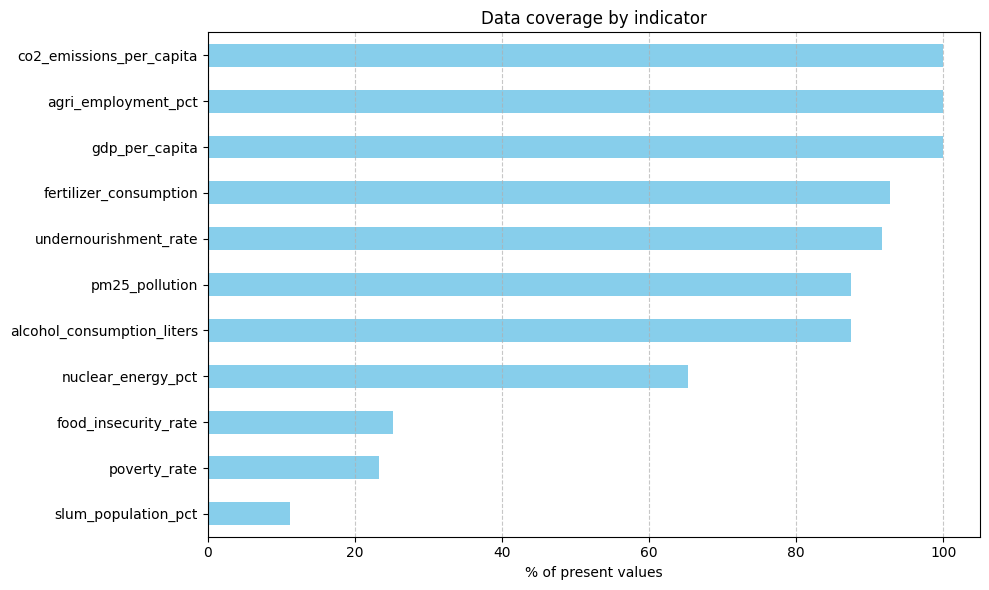

In [24]:
plt.figure(figsize=(10, 6))
coverage.plot(kind='barh', color='skyblue')
plt.title('Data coverage by indicator')
plt.xlabel('% of present values')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Now, it is verified which year has a greater number of valid indicators (without null) for each country

In [25]:
completeness = df.groupby(['country', 'year'])[num_cols].apply(lambda x: x.notna().sum().sum()).reset_index()
completeness.columns = ['country', 'year', 'available_values']

best_years = completeness.sort_values(['country', 'available_values'], ascending=[True, False]) \
                         .drop_duplicates('country')

print(best_years.sort_values('available_values', ascending=False))

                country  year  available_values
280              mexico  2016                10
392        south africa  2008                10
423               spain  2015                10
303         netherlands  2015                10
172               india  2004                10
2             argentina  2002                 9
327              norway  2015                 9
135              france  2015                 9
101               china  2005                 9
50               brazil  2002                 9
39            australia  2015                 9
195               italy  2003                 9
231               japan  2015                 9
159             germany  2015                 9
495      united kingdom  2015                 9
255         korea, rep.  2015                 9
338  russian federation  2002                 9
439              sweden  2007                 9
519       united states  2015                 9
458             turkiye  2002           

Validating negative values

In [26]:
negatives_dict = {}

for col in num_cols:
    negatives_dict[col] = (df[col] < 0).sum()

if all(value == 0 for value in negatives_dict.values()):
    print("There are no negative values in any of the indicators.")
else:
    print("Count of negative values per variable:")
    for col, count in negatives_dict.items():
        if count > 0:
            print(f"{col}: {count} negative values")
    print(negatives_dict)

There are no negative values in any of the indicators.


In [27]:
summary = pd.DataFrame({
    'Variable': num_cols,
    'Nulos (%)': [round(df[col].isnull().mean()*100, 2) for col in num_cols],
    'Min': [df[col].min() for col in num_cols],
    'Max': [df[col].max() for col in num_cols],
    'Outliers (estimado)': [((df[col] > df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))) | 
                              (df[col] < df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)))).sum()
                             for col in num_cols]
})

summary

,Variable,Nulos (%),Min,Max,Outliers (estimado)
0,co2_emissions_per_capita,0.00,0.938683,21.012618,0
1,nuclear_energy_pct,34.66,0.000000,79.511660,18
2,agri_employment_pct,0.00,0.570907,59.644730,47
3,fertilizer_consumption,7.20,5.049011,7180.738745,18
4,gdp_per_capita,0.00,442.750219,108798.451166,6
5,pm25_pollution,12.50,5.636708,79.037396,60
6,slum_population_pct,88.83,14.126110,55.294770,11
7,poverty_rate,76.70,0.000000,66.600000,18
8,food_insecurity_rate,74.81,2.000000,37.000000,14
9,undernourishment_rate,8.33,2.500000,22.000000,60


💭 ***Conclusions on the imputation of null values***

1. **Indicators with null possibly representing real zeros**

    In the `nuclear_energy_pct` and `alcohol_consumption_liters` indicators, the possibility that the null values correspond to real zeros (for example, countries that do not consume nuclear energy or alcohol) is considered. To validate this hypothesis, additional research will be carried out both within the data set and by consulting external sources.

2. **Indicators with less than 20% null values**

    For these cases, it is be decided to make an imputation per country using the median, in order to avoid biases derived from extreme values that could distort the mean.

3. **Indicators with a critical number of null values**

    Three variables were identified with a high proportion of missing data. Through the analysis of its distribution by country and year, it will be evaluated if it is feasible to apply any imputation method. Otherwise, it will be considered to eliminate them to avoid incorporating biased estimates that do not adequately reflect the reality of the countries under study.

##### ***Handling null values***

This section of the notebook will be divided into 4 parts:

- Imputation of values for indicators whose null could be real zeros.
- Imputation of values using the median for indicators with null pro below 20%
- Validation of distributions to handle indicators with high percentages of null (> 80%)
- Imputation of null values that weren´t real zeros in the indicators validated

👾 ***Imputation of values for indicators whose null could be real zeros.***

After validating whether there was a possibility that some countries did not use nuclear power generation plants, it was found that if there were some countries of the Dataframe whose null did represent zeros such as `saudi arabia`, `australia`, `norway`, `italy `,` touriye `. In addition, it was found that from 2023 `germany` closed its last 3 nuclear plants to generate energy.

Finally, for `alcohol_consumption_liters` it was found that in `saudi arabia` alcohol consumption is prohibited and by verifying within the dataset the records of this country in this indicator it was evident that the nulls also represent a real zero.

In [28]:
paises_sin_nuclear = ['saudi arabia', 'australia', 'norway', 'italy', 'turkiye']
df.loc[(df['country'].isin(paises_sin_nuclear)) & (df['nuclear_energy_pct'].isna()), 'nuclear_energy_pct'] = 0

In [29]:
df.loc[(df['country'] == 'germany') & (df['year'] > 2022), 'nuclear_energy_pct'] = 0

In [30]:
valor = "saudi arabia"
df[df["country"]== valor]

,country,year,co2_emissions_per_capita,nuclear_energy_pct,agri_employment_pct,fertilizer_consumption,gdp_per_capita,pm25_pollution,slum_population_pct,poverty_rate,food_insecurity_rate,undernourishment_rate,alcohol_consumption_liters
3980,saudi arabia,2000,16.395195,0.0,7.208908,26.864966,11714.562368,54.820903,NaN,NaN,NaN,NaN,0.0
3981,saudi arabia,2001,16.183368,0.0,7.144859,25.642122,10805.311325,55.961196,NaN,NaN,NaN,5.0,0.0
3982,saudi arabia,2002,16.398921,0.0,7.101898,23.568785,10586.054347,57.060084,NaN,NaN,NaN,4.9,0.0
3983,saudi arabia,2003,16.411722,0.0,6.992346,24.196612,11487.220411,58.024663,NaN,NaN,NaN,5.0,0.0
3984,saudi arabia,2004,16.625513,0.0,6.890582,26.000261,13154.497899,58.762026,NaN,NaN,NaN,4.8,0.0
3985,saudi arabia,2005,16.847342,0.0,6.825000,21.047286,15975.747378,59.179269,NaN,NaN,NaN,4.5,0.0
3986,saudi arabia,2006,17.090104,0.0,6.749571,20.969525,17563.614537,59.346074,NaN,NaN,NaN,4.4,0.0
3987,saudi arabia,2007,17.340382,0.0,6.665350,17.150280,18596.150263,59.434821,NaN,NaN,NaN,4.6,0.0
3988,saudi arabia,2008,18.056107,0.0,6.594673,11.732729,22320.488896,59.506651,NaN,NaN,NaN,5.3,0.0
3989,saudi arabia,2009,18.334352,0.0,6.486668,10.787992,17718.391165,59.622704,NaN,NaN,NaN,6.6,0.0


In [31]:
df.loc[(df['country'] == 'saudi arabia') & (df['alcohol_consumption_liters'].isna()), 'alcohol_consumption_liters'] = 0

👾 ***Imputation of values using the median for indicators with null pro below 20%***

In [32]:
few_nulls_vars = ['fertilizer_consumption', 'undernourishment_rate', 'pm25_pollution', 'alcohol_consumption_liters']

for var in few_nulls_vars:
    df.loc[:, var] = df.groupby('country')[var].transform(
        lambda x: x.fillna(x.median()))

In [33]:
print(f"Dataset Shape: {df.shape}")
print("\nMissing Values per Column:")
print(df.isnull().sum().sort_values())

Dataset Shape: (528, 13)

Missing Values per Column:
country                         0
year                            0
co2_emissions_per_capita        0
agri_employment_pct             0
gdp_per_capita                  0
fertilizer_consumption          0
pm25_pollution                  0
undernourishment_rate           0
alcohol_consumption_liters      0
nuclear_energy_pct            141
food_insecurity_rate          395
poverty_rate                  405
slum_population_pct           469
dtype: int64


👾 ***Validation of distributions to handle indicators with high percentages of null (> 80%)***

To verify the distribution of the 3 variables with high null values (`slum_population_pct`, `poverty_rate`, `food_insecurity_rate`), a heatmap is made that allows the number of levels of these variables to be displayed in each country

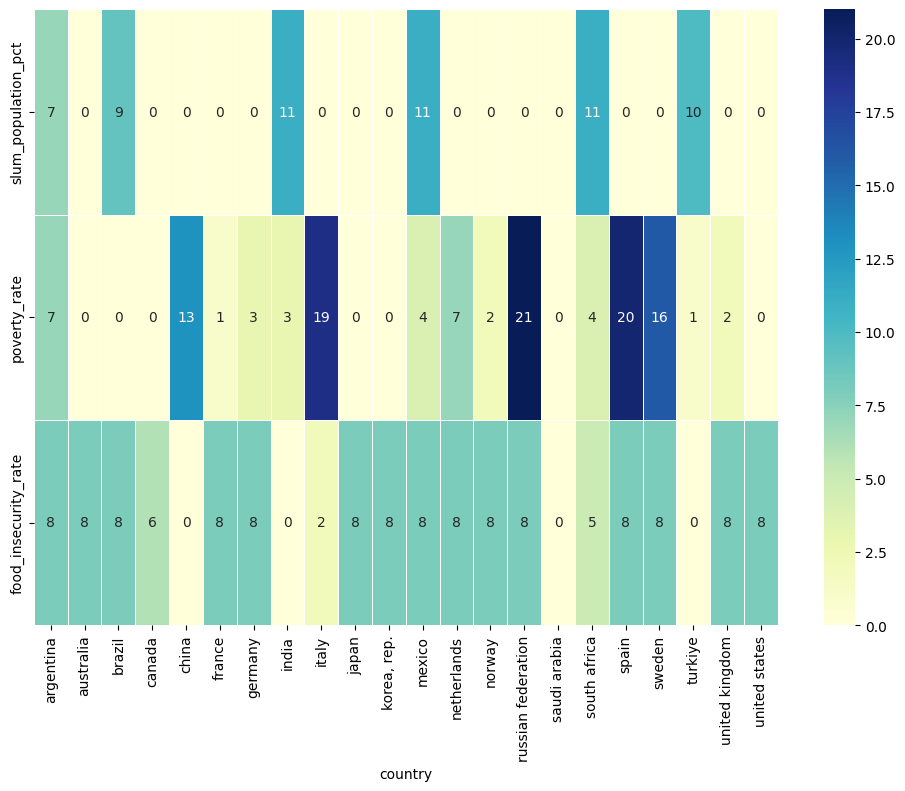

In [34]:
high_nulls_vars = ['slum_population_pct', 'poverty_rate', 'food_insecurity_rate']

coverage = df.groupby('country')[high_nulls_vars].apply(
    lambda x: x.notna().sum()
).unstack()

if isinstance(coverage, pd.Series):
    coverage = coverage.unstack()
elif coverage.shape[1] == 1:
    coverage = coverage.T

plt.figure(figsize=(12, 8))
sns.heatmap(
    coverage,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    linewidths=.5
)
plt.show()

PENDIENTE!!

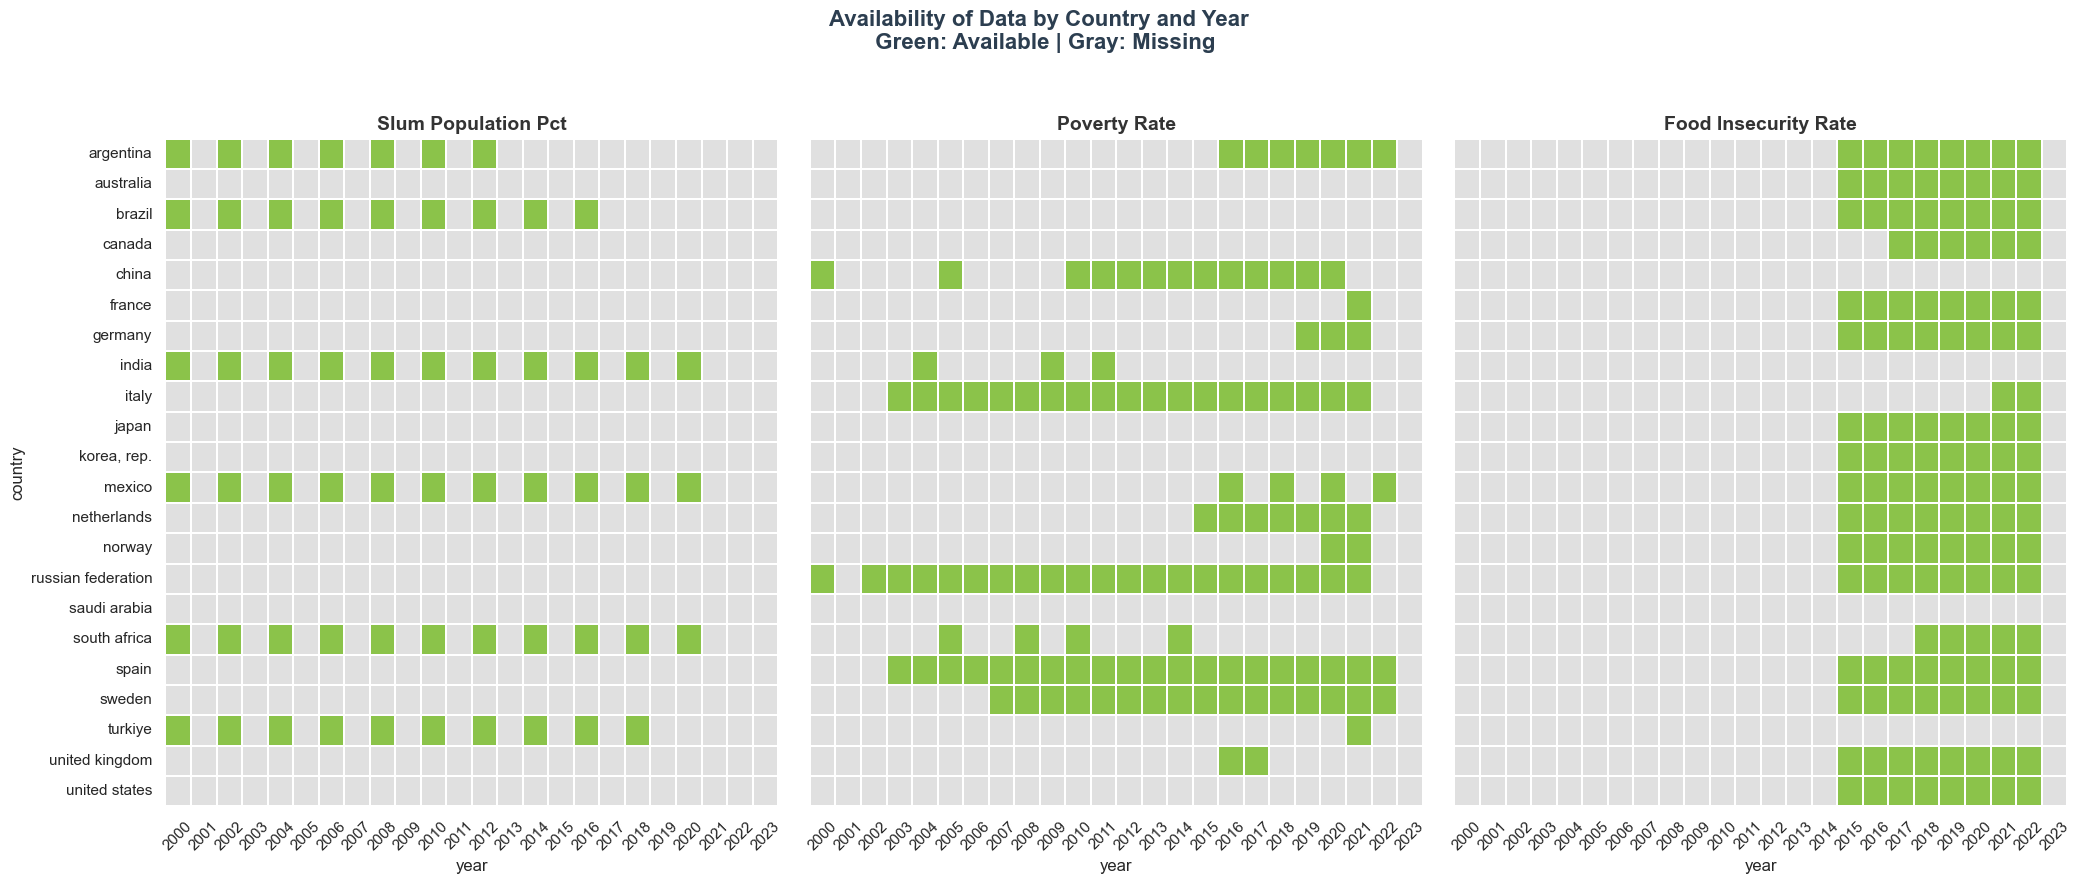

In [41]:
sns.set_theme(style="whitegrid") 

custom_cmap = sns.color_palette(["#e0e0e0", "#8bc34a"])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 9), sharey=True)

for i, var in enumerate(high_nulls_vars):
    pivot_data = df.pivot(index='country', columns='year', values=var)

    sns.heatmap(
        pivot_data.notnull(),
        ax=axes[i],
        cmap=custom_cmap,
        cbar=False,
        linewidths=0.3,
        linecolor='white'
    )

    axes[i].set_title(
        var.replace('_', ' ').title(),
        fontsize=14,
        fontweight='bold',
        color='#333333'
    )
    axes[i].set_xlabel('year', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

    if i == 0:
        axes[i].set_ylabel('country', fontsize=12)
    else:
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='y', left=False)

plt.suptitle(
    'Availability of Data by Country and Year \n Green: Available | Gray: Missing',
    fontsize=16,
    fontweight='bold',
    color='#2c3e50'
)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Con esta grafica se decide que el indicador `slum_population_pct` se debe eliminar del Dataframe debido a la alta cantidad de nulos en mas 

In [ ]:
df = df.drop(columns=["slum_population_pct", "food_insecurity_rate", "poverty_rate"])
print("Variables descartadas. Columnas restantes:", df.columns.tolist())

Variable descartada. Columnas restantes: ['country', 'year', 'co2_emissions_per_capita', 'nuclear_energy_pct', 'agri_employment_pct', 'fertilizer_consumption', 'gdp_per_capita', 'pm25_pollution', 'undernourishment_rate', 'alcohol_consumption_liters']


In [34]:
# 1. Para el FutureWarning de pandas
# Crear grupos de países por cuartiles de GDP
df['gdp_group'] = pd.qcut(df['gdp_per_capita'], 
                         q=4, 
                         labels=['Q1 (lowest)', 'Q2', 'Q3', 'Q4 (highest)'])

group_cols = ['gdp_group', 'year']

# 2. Función segura para manejar grupos vacíos
def safe_impute(x):
    if x.notna().sum() > 0:
        return x.fillna(x.median())
    return x

# 3. Aplicar con observed=False
df['poverty_rate'] = df.groupby(group_cols, observed=False)['poverty_rate'].transform(safe_impute)

# 4. Imputación residual por año
df['poverty_rate'] = df.groupby('year')['poverty_rate'].transform(
    lambda x: x.fillna(x.median()) if x.notna().sum() > 0 else x
)

# 5. Verificación final
if df['poverty_rate'].isna().any():
    print(f"Quedan {df['poverty_rate'].isna().sum()} valores nulos después de imputación")

Quedan 44 valores nulos después de imputación


In [35]:
from sklearn.ensemble import RandomForestRegressor

# Primero: interpolación lineal para cada país
df = df.sort_values(['country', 'year'])
df['food_insecurity_rate'] = df.groupby('country')['food_insecurity_rate'].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

# Segundo: modelo predictivo para valores residuales
if df['food_insecurity_rate'].isna().any():
    # Seleccionar variables predictoras (ajustar según tu dataset)
    features = ['gdp_per_capita', 'undernourishment_rate', 'agri_employment_pct']
    
    # Datos para entrenamiento (donde sí hay valores)
    train_data = df.dropna(subset=['food_insecurity_rate'])
    
    if not train_data.empty:
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(train_data[features], train_data['food_insecurity_rate'])
        
        # Predecir valores faltantes
        missing_mask = df['food_insecurity_rate'].isna()
        df.loc[missing_mask, 'food_insecurity_rate'] = model.predict(
            df.loc[missing_mask, features]
        )
    
    # Si aún quedan nulos (por falta de predictores), usar mediana por año
    df['food_insecurity_rate'] = df.groupby('year')['food_insecurity_rate'].transform(
        lambda x: x.fillna(x.median())
    )

In [46]:
# Verificar que no quedan nulos
print("\nNulos restantes después de imputación:")
print(df[['poverty_rate', 'food_insecurity_rate']].isnull().sum())


Nulos restantes después de imputación:
poverty_rate            44
food_insecurity_rate     0
dtype: int64


In [47]:
# Paso 1: Crear grupo de desarrollo basado en el PIB per cápita
df['dev_group'] = pd.qcut(df['gdp_per_capita'], q=3, labels=['low', 'medium', 'high'])

# Paso 2: Definir función robusta para imputar la mediana por grupo
def robust_impute(series):
    if series.notna().sum() > 0:
        return series.fillna(series.median())
    return series  # Si todo es NaN, lo dejamos igual

# Paso 3: Imputación por grupo (desarrollo y año)
df['poverty_rate'] = df.groupby(['dev_group', 'year'])['poverty_rate'].transform(robust_impute)

# Paso 4: Imputación final por año (por si aún quedan nulos)
df['poverty_rate'] = df.groupby('year')['poverty_rate'].transform(lambda x: x.fillna(x.median()))


C:\Users\valen\AppData\Local\Temp\ipykernel_24364\4212398004.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['poverty_rate'] = df.groupby(['dev_group', 'year'])['poverty_rate'].transform(robust_impute)
c:\Users\valen\Desktop\Leukemia-Cancer-Risk-ETL\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\valen\Desktop\Leukemia-Cancer-Risk-ETL\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [39]:
# Asegurar que años posteriores al cierre sean cero
df.loc[(df['country'] == 'germany') & (df['year'] > 2022), 'nuclear_energy_pct'] = 0

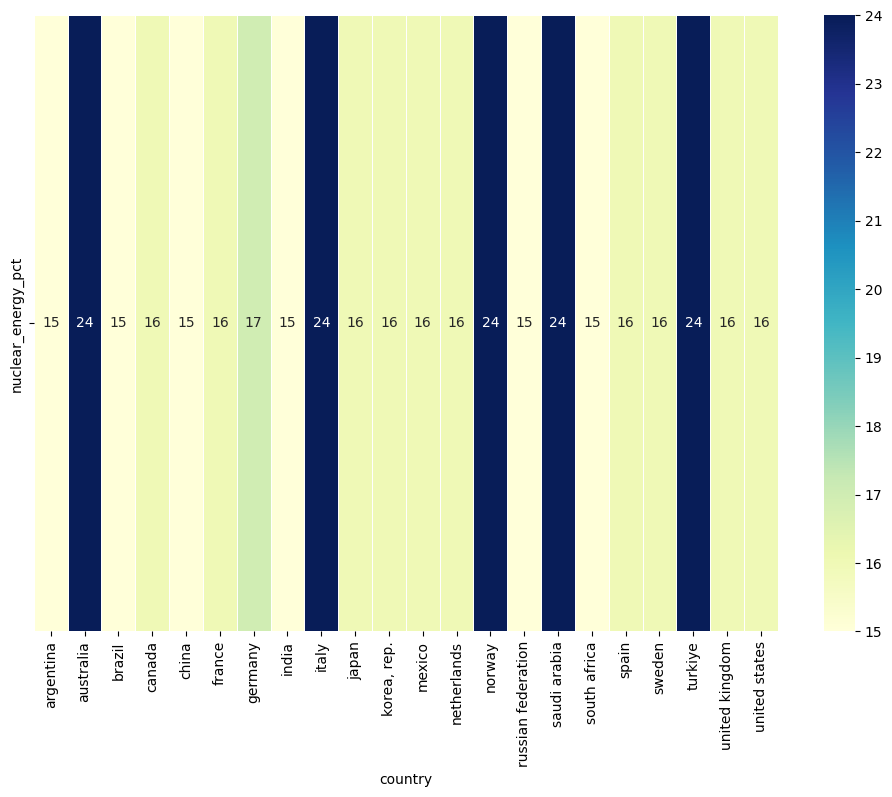

In [40]:
# Variables con alta tasa de nulos
vars_altos_nulos = ['nuclear_energy_pct']

# 1. Crear matriz de cobertura 2D
cobertura = df.groupby('country')[vars_altos_nulos].apply(
    lambda x: x.notna().sum()
).unstack()

# 2. Verificar y corregir dimensiones
if isinstance(cobertura, pd.Series):
    cobertura = cobertura.unstack()
elif cobertura.shape[1] == 1:
    cobertura = cobertura.T

# 3. Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    cobertura,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    linewidths=.5
)
plt.show()

In [ ]:
df['nuclear_energy_pct'] = df.groupby('country')['nuclear_energy_pct'].ffill().bfill()

df['nuclear_energy_pct'] = df.groupby('country')['nuclear_energy_pct'].transform(
    lambda x: x.interpolate(method='linear', limit_area='inside')
)

df['nuclear_energy_pct'] = df.groupby('country')['nuclear_energy_pct'].transform(
    lambda x: x.fillna(x.rolling(3, min_periods=1, center=True).mean())
)

print(f"Nulos restantes: {df['nuclear_energy_pct'].isnull().sum()}")

Nulos restantes: 0


In [41]:
num_cols = ['co2_emissions_per_capita', 'nuclear_energy_pct', 'agri_employment_pct' , 'fertilizer_consumption', 'gdp_per_capita', 'pm25_pollution', 'undernourishment_rate', 'alcohol_consumption_liters']
summary = pd.DataFrame({
    'Variable': num_cols,
    'Nulos (%)': [round(df[col].isnull().mean()*100, 2) for col in num_cols],
    'Min': [df[col].min() for col in num_cols],
    'Max': [df[col].max() for col in num_cols],
    'Outliers (estimado)': [((df[col] > df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))) | 
                              (df[col] < df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)))).sum()
                             for col in num_cols]
})

summary

,Variable,Nulos (%),Min,Max,Outliers (estimado)
0,co2_emissions_per_capita,0.00,0.938683,21.012618,0
1,nuclear_energy_pct,26.89,0.000000,79.511660,18
2,agri_employment_pct,0.00,0.570907,59.644730,47
3,fertilizer_consumption,0.00,5.049011,7180.738745,16
4,gdp_per_capita,0.00,442.750219,108798.451166,6
5,pm25_pollution,0.00,5.636708,79.037396,69
6,undernourishment_rate,0.00,2.500000,22.000000,64
7,alcohol_consumption_liters,0.00,0.000000,14.650000,24


In [45]:
print(f"Dataset Shape: {df.shape}")
print("\nMissing Values per Column:")
print(df.isnull().sum().sort_values())

Dataset Shape: (528, 14)

Missing Values per Column:
country                        0
year                           0
co2_emissions_per_capita       0
nuclear_energy_pct             0
agri_employment_pct            0
fertilizer_consumption         0
gdp_per_capita                 0
pm25_pollution                 0
food_insecurity_rate           0
undernourishment_rate          0
alcohol_consumption_liters     0
gdp_group                      0
dev_group                      0
poverty_rate                  44
dtype: int64


#### Validating outliers

(PENDIENTE!!!!) when we take a closer look into the indicators we can note that some of them are percentages. This allows to set an acceptable range of values that we can be certain can be there. 

Regarding the rest of the indicators we are gonna validate tha range of values allowed with the interquartile range which is going to be used to establish a “normal” range in which the data values should be found.

##### Percentage indicators



In [46]:
pct_indicators= ['nuclear_energy_pct', 'agri_employment_pct', 'slum_population_pct', 'poverty_rate', 'food_insecurity_rate', 'undernourishment_rate']

Validating values in percentage indicators

In [ ]:
df[pct_indicators].agg(['min', 'max'])

After validating the maximum and minimum values in percentage columns, we can affirm that it seems that there are no outliers for the percentage indicators.

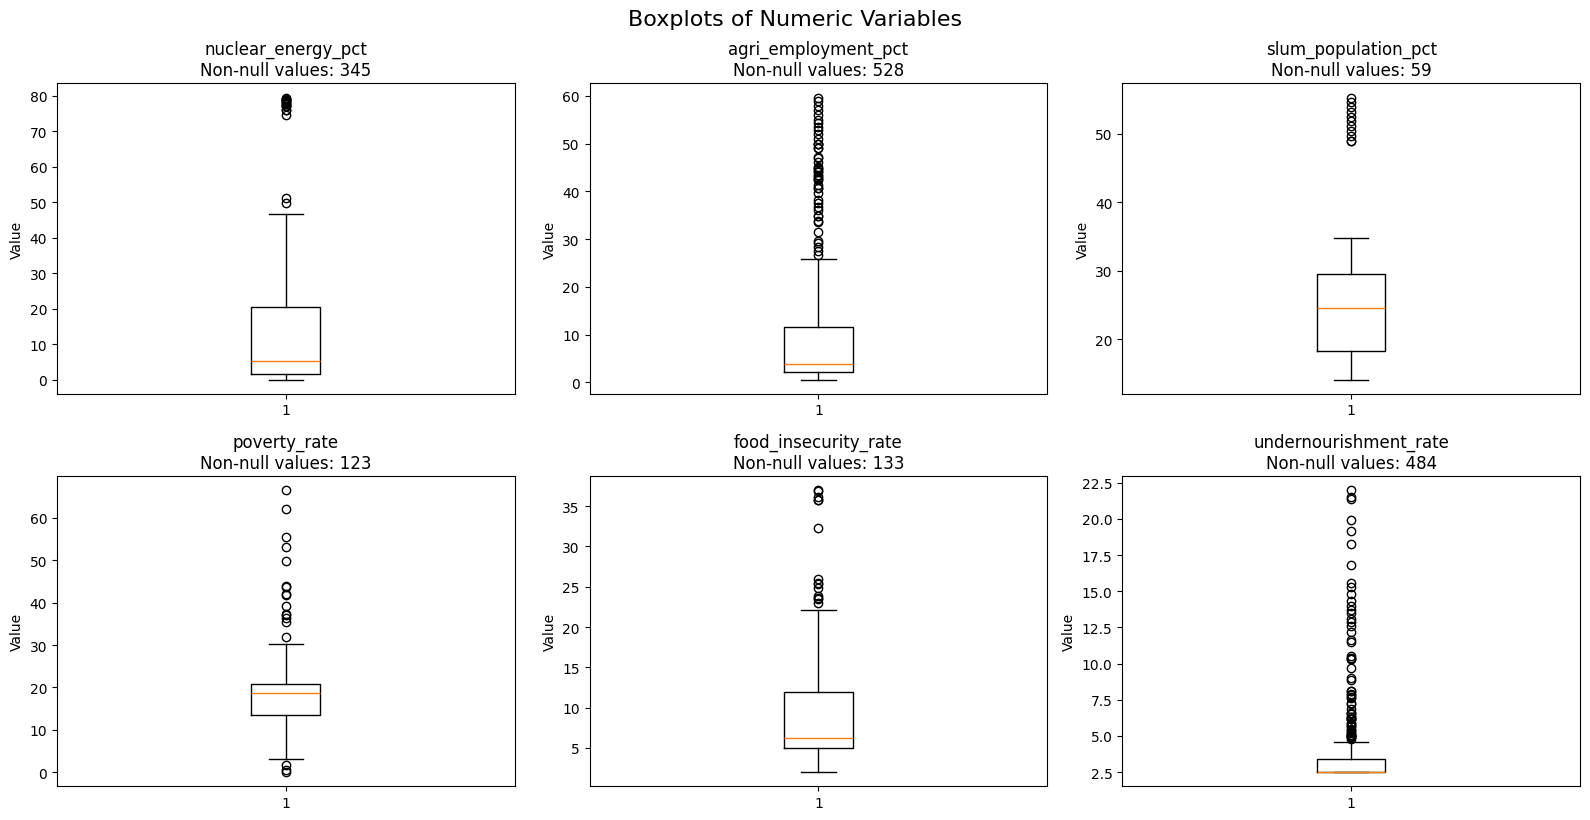

In [ ]:
n_cols = 3
n_rows = (len(pct_indicators) + n_cols - 1) // n_cols  # Redondeo hacia arriba

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(pct_indicators):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(f'{col}\nNon-null values: {df[col].count()}')
    axes[i].set_ylabel('Value')

# Si hay subplots no usados, los ocultamos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Boxplots of Numeric Variables', fontsize=16, y=1.02)
plt.show()


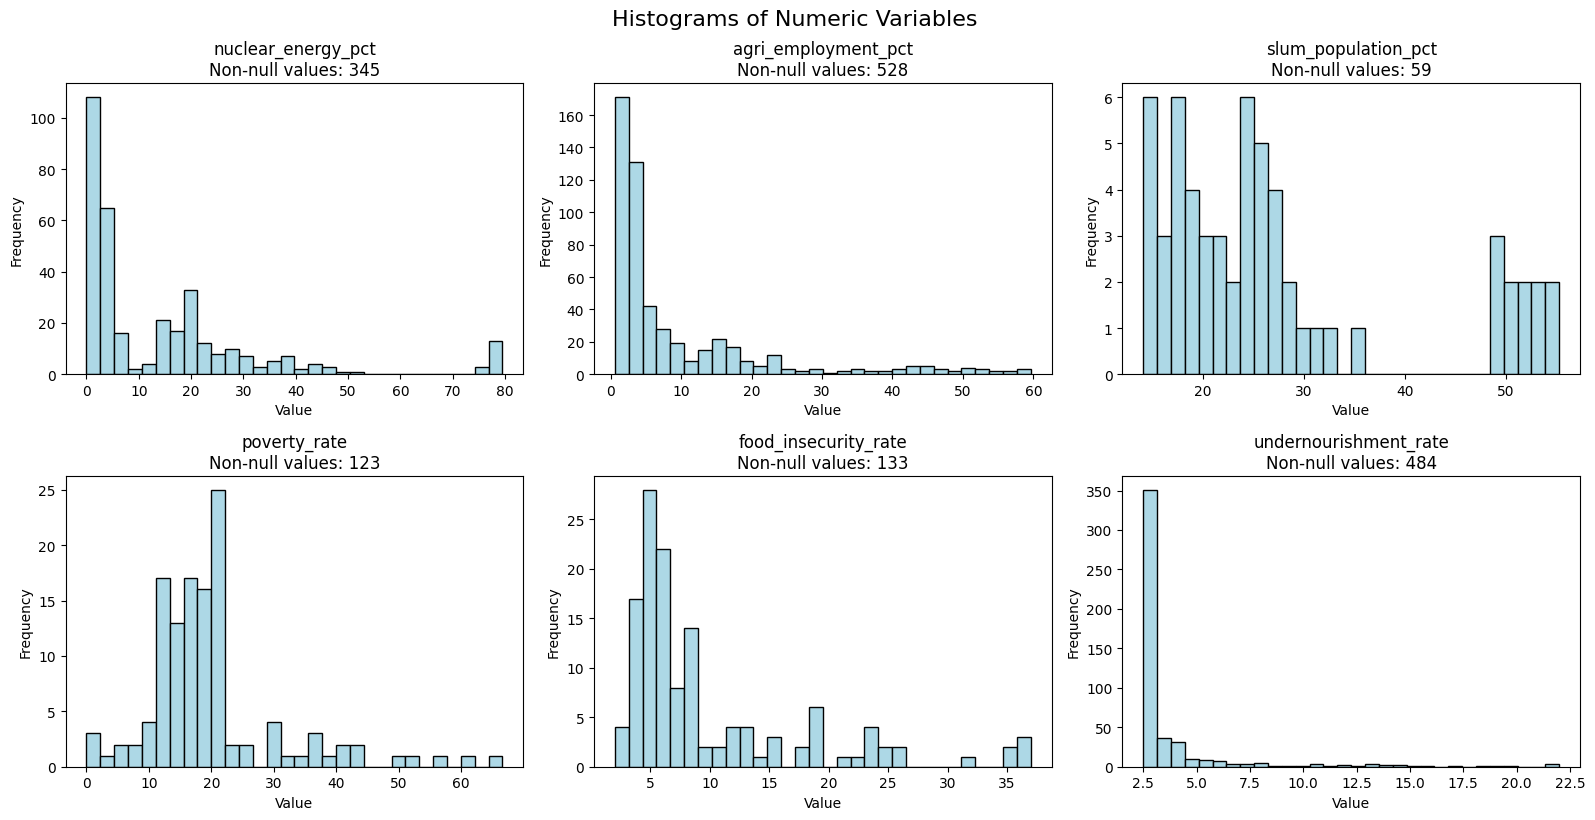

In [36]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(pct_indicators):
    axes[i].hist(df[col].dropna(), bins=30, color='lightblue', edgecolor='black')
    axes[i].set_title(f'{col}\nNon-null values: {df[col].count()}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Histograms of Numeric Variables', fontsize=16, y=1.02)
plt.show()


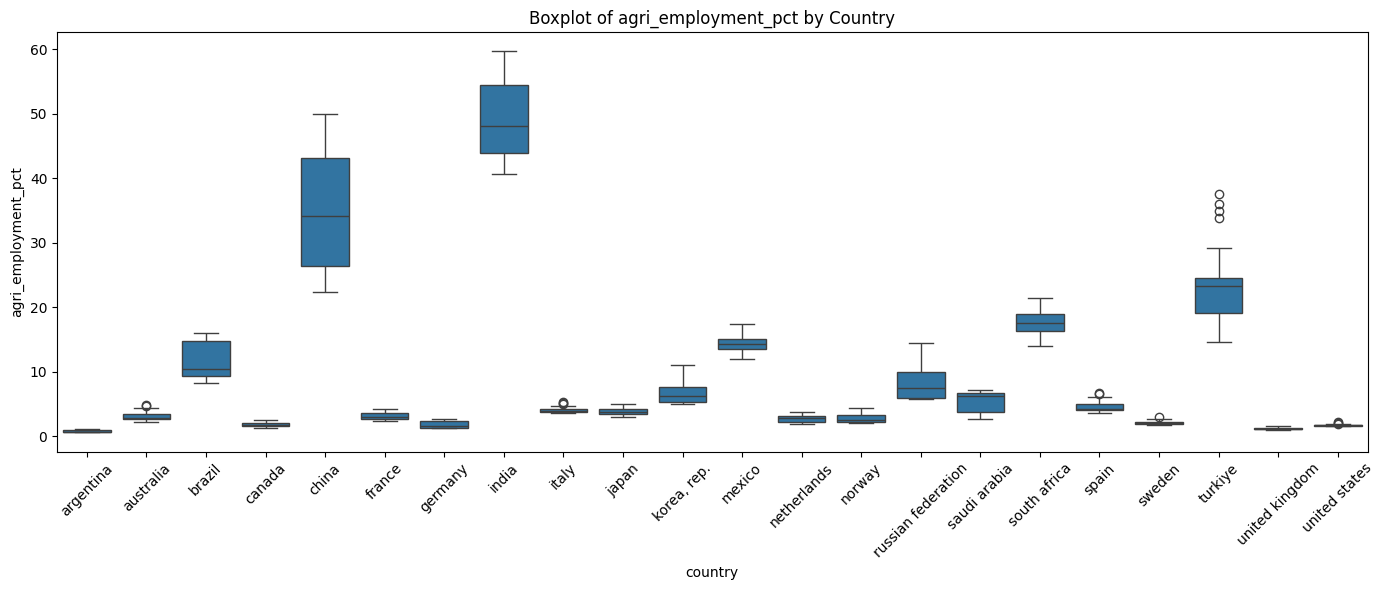

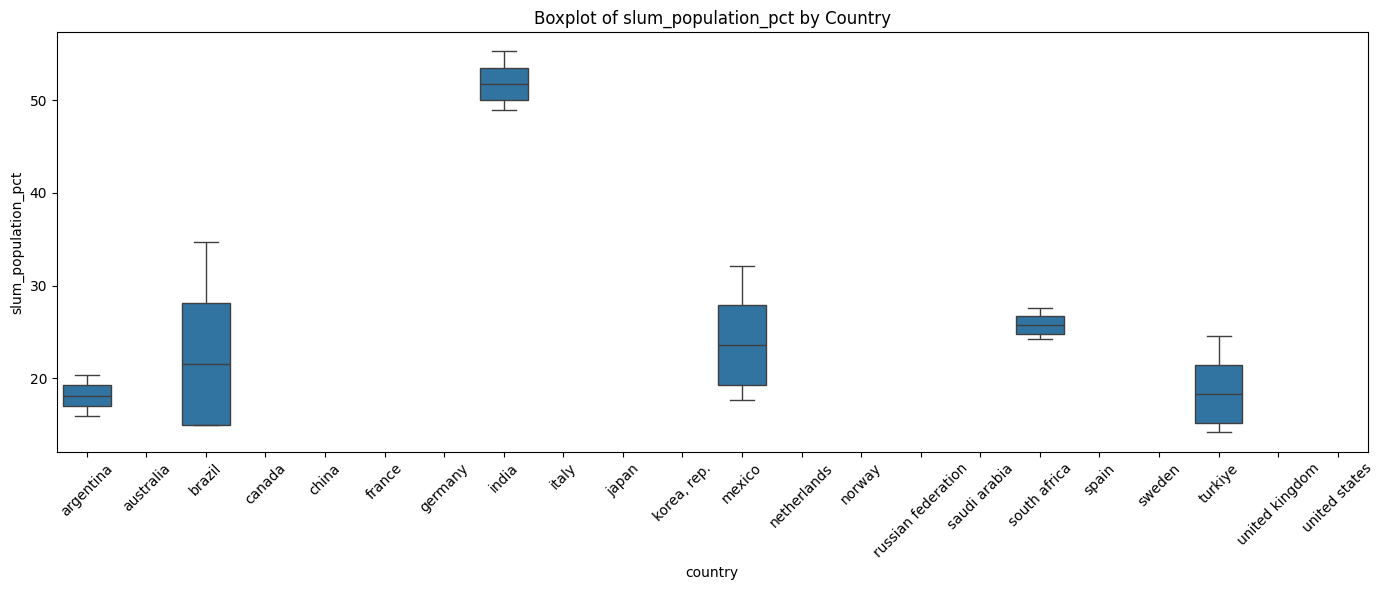

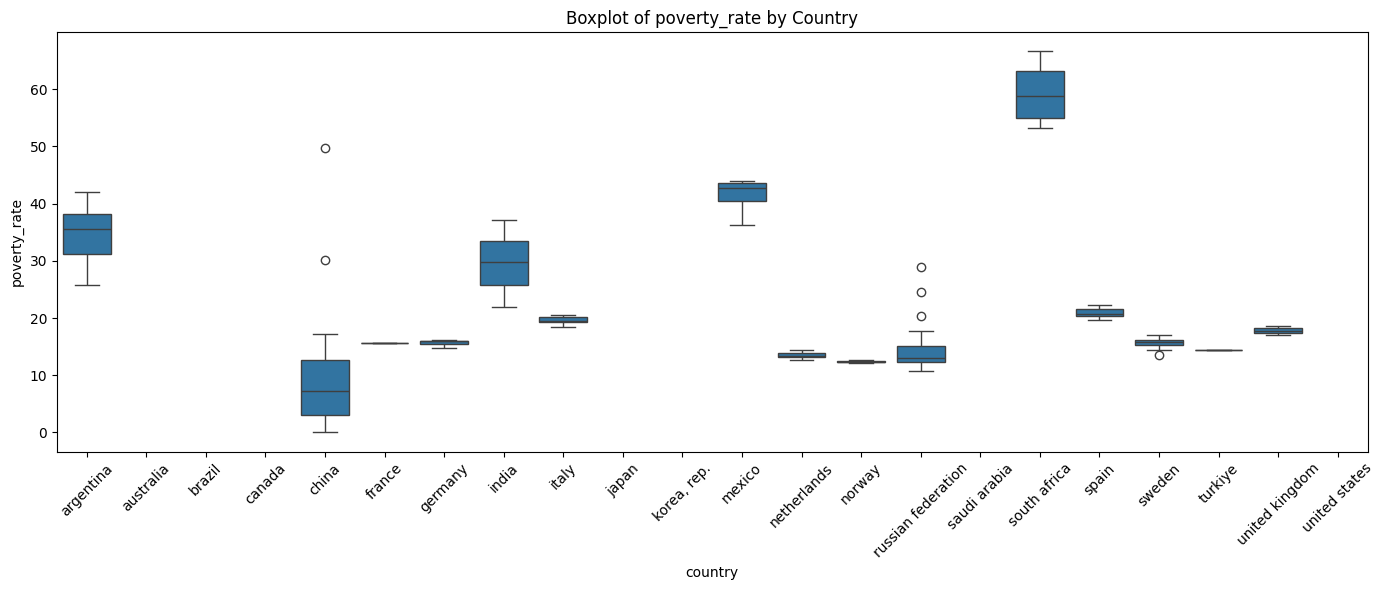

In [ ]:
cols_to_check = ['agri_employment_pct', 'slum_population_pct', 'poverty_rate']

for col in cols_to_check:
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=df, x='country', y=col)
    plt.title(f'Boxplot of {col} by Country')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Verifying general distributions and intial correlations between indicators

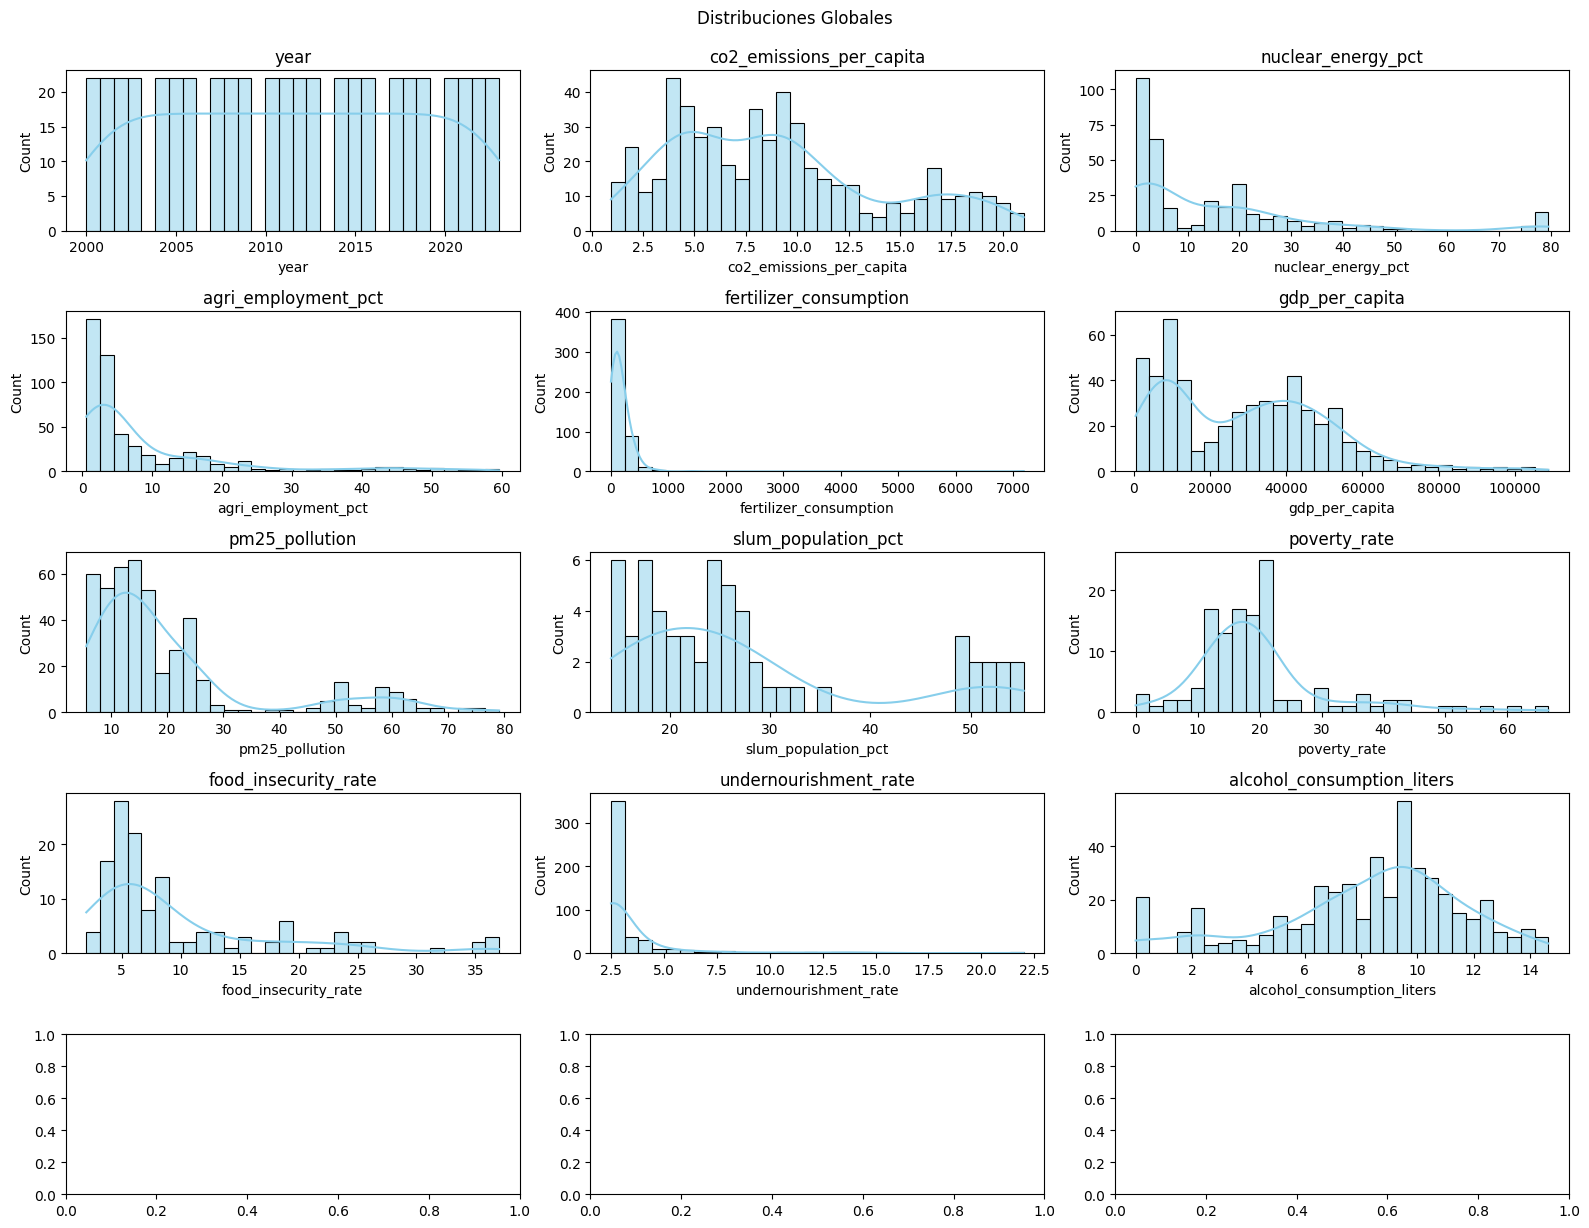

In [47]:
numeric_cols = df.select_dtypes(include='number').columns

fig, axes = plt.subplots(nrows=(len(numeric_cols) // 3 + 1), ncols=3, figsize=(16, 12))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(col)
plt.tight_layout()
plt.suptitle("Distribuciones Globales", y=1.02)
plt.show()

### Conclusions